In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from helpers import *

In [2]:
#Cargamos el fichero de los partidos de 22/23
df = pd.read_csv('./Data/0.Partidos.csv')
df.head()

,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,12/08/2022,20:00,Osasuna,Sevilla FC,2,1,H,1,1,D,...,5,3,16,9,5,2,5,3,0,0
1,13/08/2022,16:00,Celta de Vigo,RCD Espanyol,2,2,D,1,0,H,...,3,2,17,15,3,3,5,2,0,0
2,13/08/2022,18:00,Real Valladolid,Villarreal CF,0,3,A,0,0,D,...,6,4,6,10,4,5,1,0,0,0
3,13/08/2022,20:00,FC Barcelona,Rayo Vallecano,0,0,D,0,0,D,...,6,2,16,14,8,0,3,6,1,0
4,14/08/2022,16:30,Cadiz CF,Real Sociedad,0,1,A,0,1,A,...,2,7,9,20,3,6,4,2,0,0


In [3]:
#Obtenemos una lista con todos los nombres de los equipos
lista_equipos=df['HomeTeam'].unique()
lista_equipos

array(['Osasuna', 'Celta de Vigo', 'Real Valladolid', 'FC Barcelona',
       'Cadiz CF', 'Valencia CF', 'UD Almería', 'Athletic Club',
       'Getafe CF', 'Real Betis', 'RCD Espanyol', 'Sevilla FC',
       'RCD Mallorca', 'Atlético de Madrid', 'Real Sociedad', 'Elche CF',
       'Girona FC', 'Rayo Vallecano', 'Real Madrid', 'Villarreal CF'],
      dtype=object)

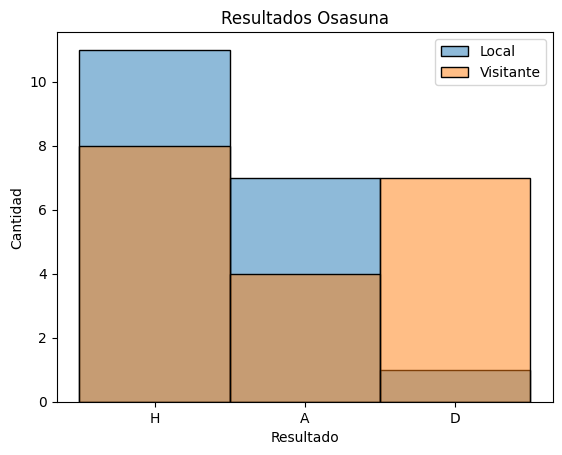

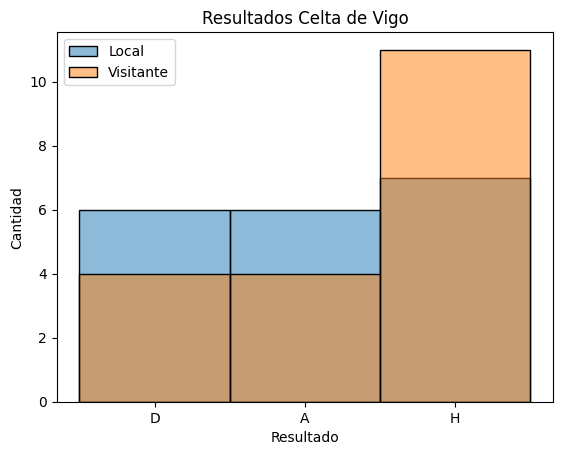

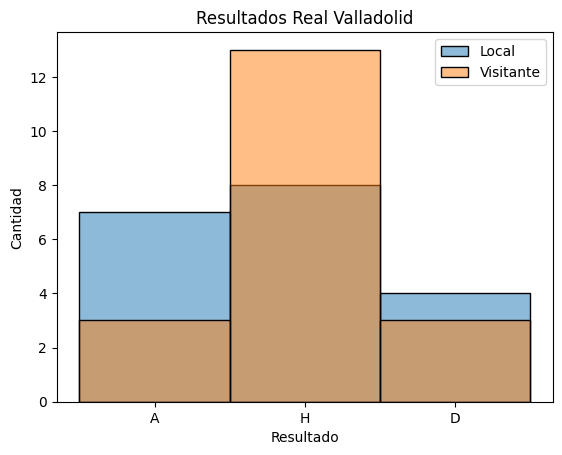

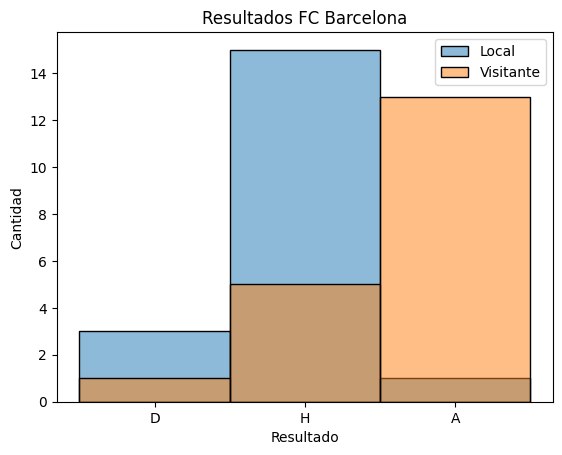

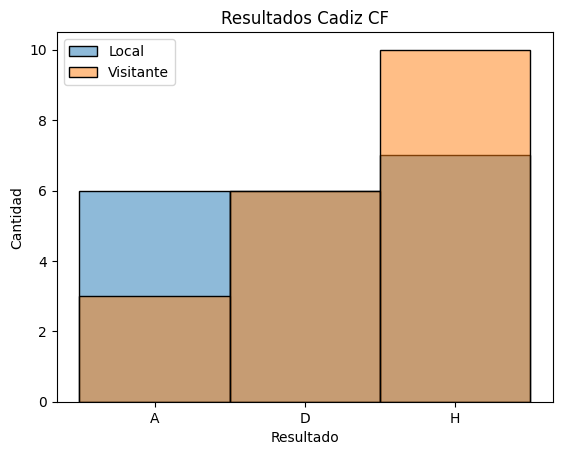

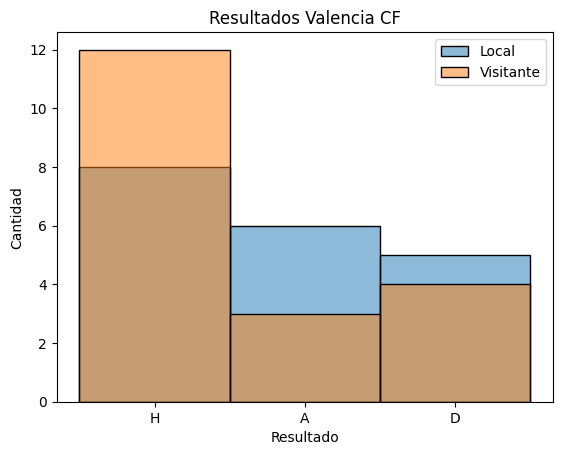

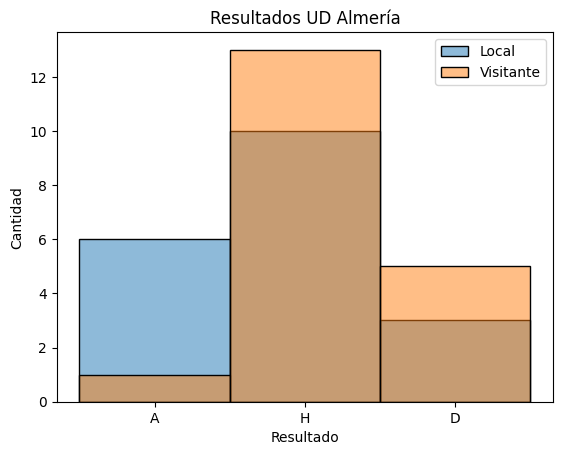

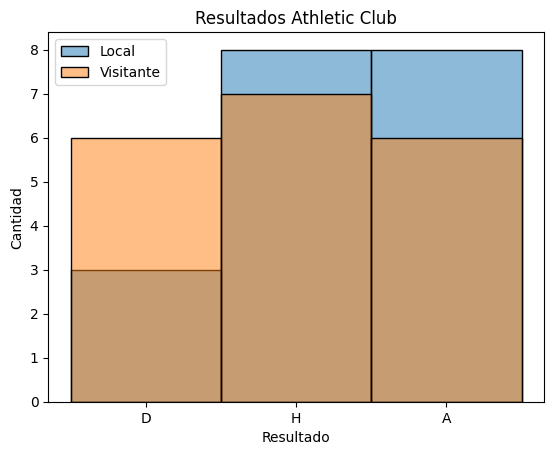

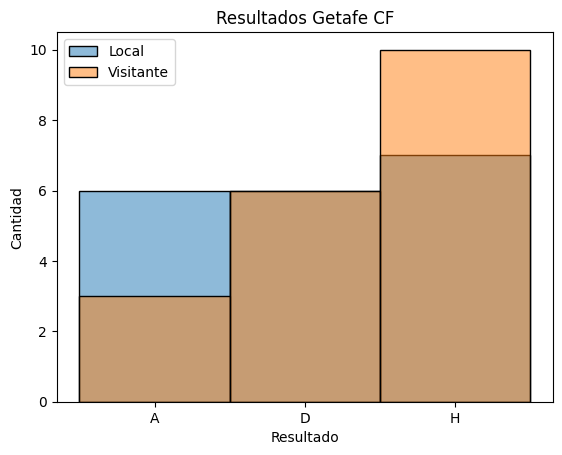

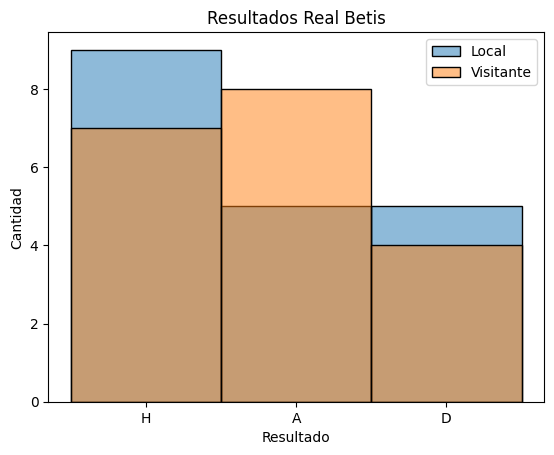

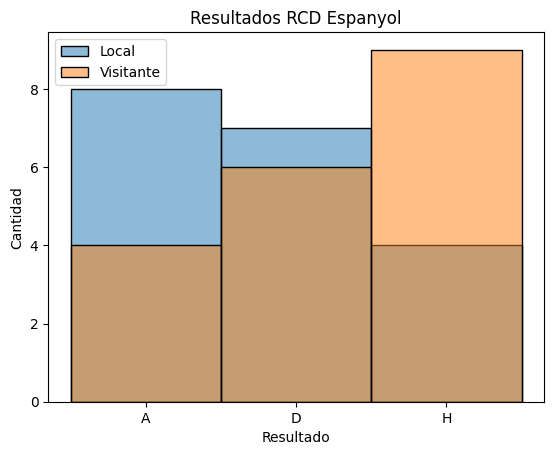

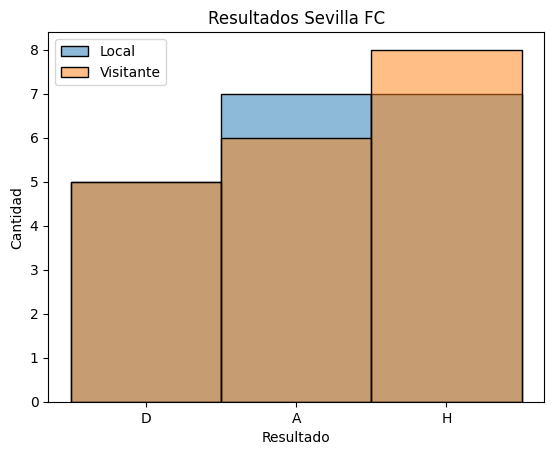

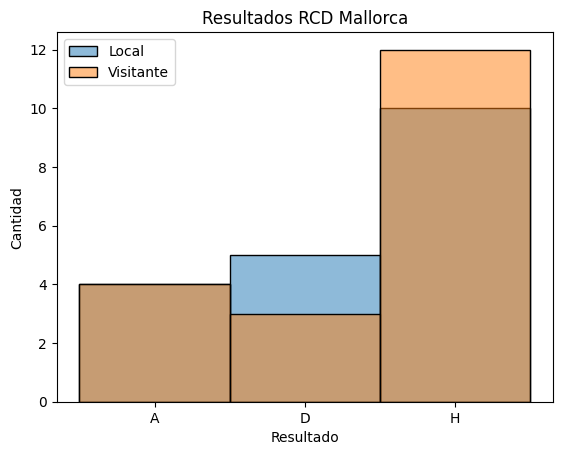

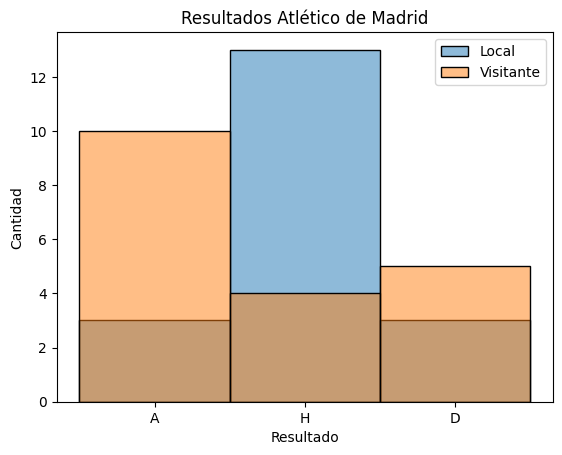

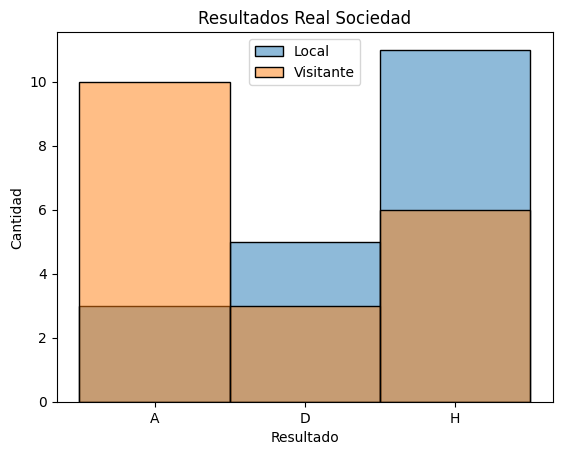

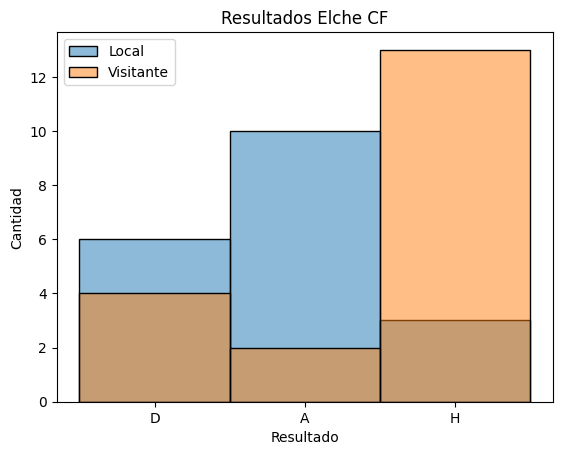

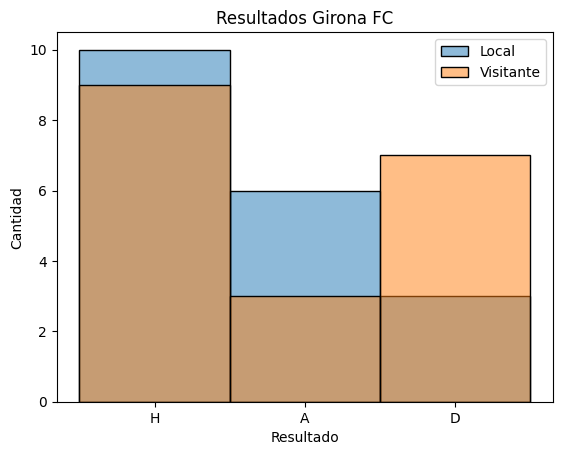

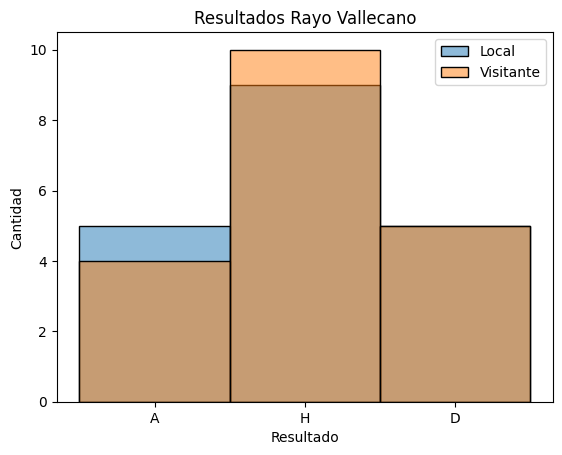

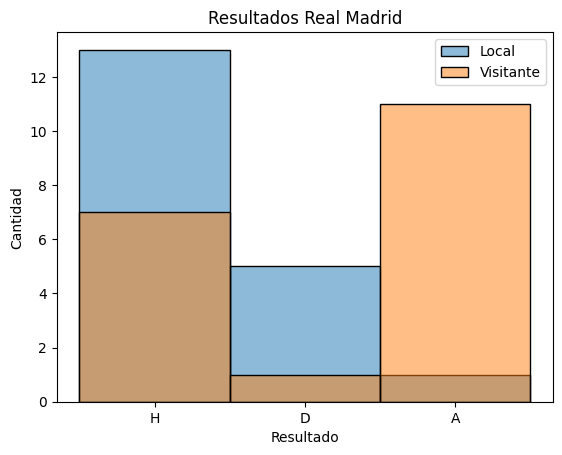

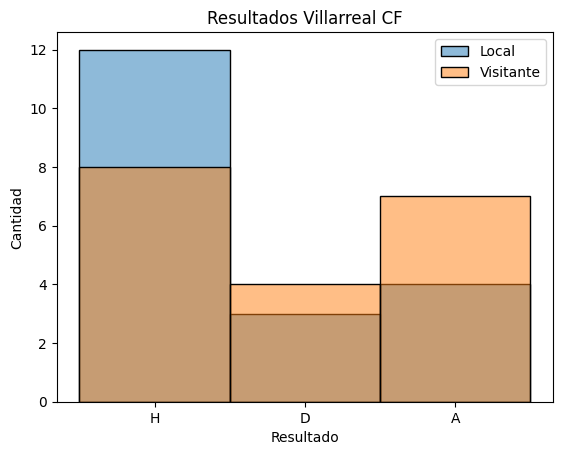

In [17]:
for equipo in lista_equipos:
    plt.figure();
    df_equipo=data_equipo(df,equipo)
    datos_local=data_local(df_equipo,equipo)
    datos_visitante=data_visitante(df_equipo,equipo)
    sns.histplot(datos_local['FTR'],alpha=0.5, label='Local');
    sns.histplot(datos_visitante['FTR'],alpha=0.5, label='Visitante');
    plt.legend();
    plt.title('Resultados ' + equipo);
    plt.xlabel('Resultado')
    plt.ylabel('Cantidad')
    plt.savefig('./Histograma Resultados/'+ equipo+'.png');

# Victorias en funcion de la hora

In [26]:
#Cargamos el fichero de los partidos de 22/23
df_partidos = pd.read_csv('./Data/0.Partidos.csv')
df.head()


,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,12/08/2022,20:00,Osasuna,Sevilla FC,2,1,H,1,1,D,...,5,3,16,9,5,2,5,3,0,0
1,13/08/2022,16:00,Celta de Vigo,RCD Espanyol,2,2,D,1,0,H,...,3,2,17,15,3,3,5,2,0,0
2,13/08/2022,18:00,Real Valladolid,Villarreal CF,0,3,A,0,0,D,...,6,4,6,10,4,5,1,0,0,0
3,13/08/2022,20:00,FC Barcelona,Rayo Vallecano,0,0,D,0,0,D,...,6,2,16,14,8,0,3,6,1,0
4,14/08/2022,16:30,Cadiz CF,Real Sociedad,0,1,A,0,1,A,...,2,7,9,20,3,6,4,2,0,0


In [19]:
df_clasi = pd.read_csv('./Data/1.Clasificacion.csv')
df_clasi.head()

,Equipo,V,E,D,Goles a favor,Goles en contra,Puntos
0,FC Barcelona,28,4,6,70,20,88
1,Real Madrid,24,6,8,75,36,78
2,Atlético de Madrid,23,8,7,70,33,77
3,Real Sociedad,21,8,9,51,35,71
4,Villarreal CF,19,7,12,59,40,64


In [33]:
df_partidos['Horas Decimal']=np.array(range(len(df_partidos)))
c=0
for i in df_partidos['Time']:
    horas, minutos = i.split(':')
    df_partidos.at[c,'Horas Decimal']=int(horas) + int(minutos)/60
    c+=1
df_partidos
intervalos = [0, 13, 16, 19,24]
etiquetas = ['Mañana', 'Mediodia', 'Tarde','Noche']
df_partidos['Horario'] = pd.cut(df_partidos['Horas Decimal'], bins=intervalos, labels=etiquetas)
df_partidos


C:\Users\aritz\AppData\Local\Temp\ipykernel_8280\3719005221.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '16.5' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df_partidos.at[c,'Horas Decimal']=int(horas) + int(minutos)/60


,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HF,AF,HC,AC,HY,AY,HR,AR,Horas Decimal,Horario
0,12/08/2022,20:00,Osasuna,Sevilla FC,2,1,H,1,1,D,...,16,9,5,2,5,3,0,0,20.0,Noche
1,13/08/2022,16:00,Celta de Vigo,RCD Espanyol,2,2,D,1,0,H,...,17,15,3,3,5,2,0,0,16.0,Mediodia
2,13/08/2022,18:00,Real Valladolid,Villarreal CF,0,3,A,0,0,D,...,6,10,4,5,1,0,0,0,18.0,Tarde
3,13/08/2022,20:00,FC Barcelona,Rayo Vallecano,0,0,D,0,0,D,...,16,14,8,0,3,6,1,0,20.0,Noche
4,14/08/2022,16:30,Cadiz CF,Real Sociedad,0,1,A,0,1,A,...,9,20,3,6,4,2,0,0,16.5,Tarde
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,04/06/2023,20:00,Real Betis,Valencia CF,1,1,D,1,0,H,...,11,11,5,4,3,0,0,1,20.0,Noche
376,04/06/2023,20:00,Celta de Vigo,FC Barcelona,2,1,H,1,0,H,...,13,9,2,4,2,2,0,0,20.0,Noche
377,04/06/2023,20:00,Elche CF,Cadiz CF,1,1,D,0,1,A,...,18,8,7,4,4,3,0,0,20.0,Noche
378,04/06/2023,20:00,RCD Espanyol,UD Almería,3,3,D,1,1,D,...,11,12,7,6,2,3,0,0,20.0,Noche


In [60]:
l_mañana=[]
l_mañana_jugados=[]
l_mediodia=[]
l_mediodia_jugados=[]
l_tarde=[]
l_tarde_jugados=[]
l_noche=[]
l_noche_jugados=[]
for equipo in df_clasi['Equipo']:
    df_equipo=data_equipo(df_partidos,equipo)
    df_equipo_mañana=df_equipo[df_equipo['Horario']=='Mañana']
    l_mañana_jugados.append(len(df_equipo_mañana))
    if len(df_equipo_mañana)>0:
        l_mañana.append(round(victorias(df_equipo_mañana,equipo)/len(df_equipo_mañana),2))  
    else:
        l_mañana.append(0)
    df_equipo_mediodia=df_equipo[df_equipo['Horario']=='Mediodia']
    l_mediodia_jugados.append(len(df_equipo_mediodia))
    if len(df_equipo_mediodia)>0:
        l_mediodia.append(round(victorias(df_equipo_mediodia,equipo)/len(df_equipo_mediodia),2))
    else:
        l_mediodia.append(0)
    l_tarde_jugados.append(len(df_equipo_tarde))
    df_equipo_tarde=df_equipo[df_equipo['Horario']=='Tarde']
    if len(df_equipo_tarde)>0:
        l_tarde.append(round(victorias(df_equipo_tarde,equipo)/len(df_equipo_tarde),2))
    else:
        l_tarde.append(0)
    l_noche_jugados.append(len(df_equipo_noche))
    df_equipo_noche=df_equipo[df_equipo['Horario']=='Noche']
    if len(df_equipo_noche)>0:
        l_noche.append(round(victorias(df_equipo_noche,equipo)/len(df_equipo_noche),2))
    else:
        l_noche.append(0)



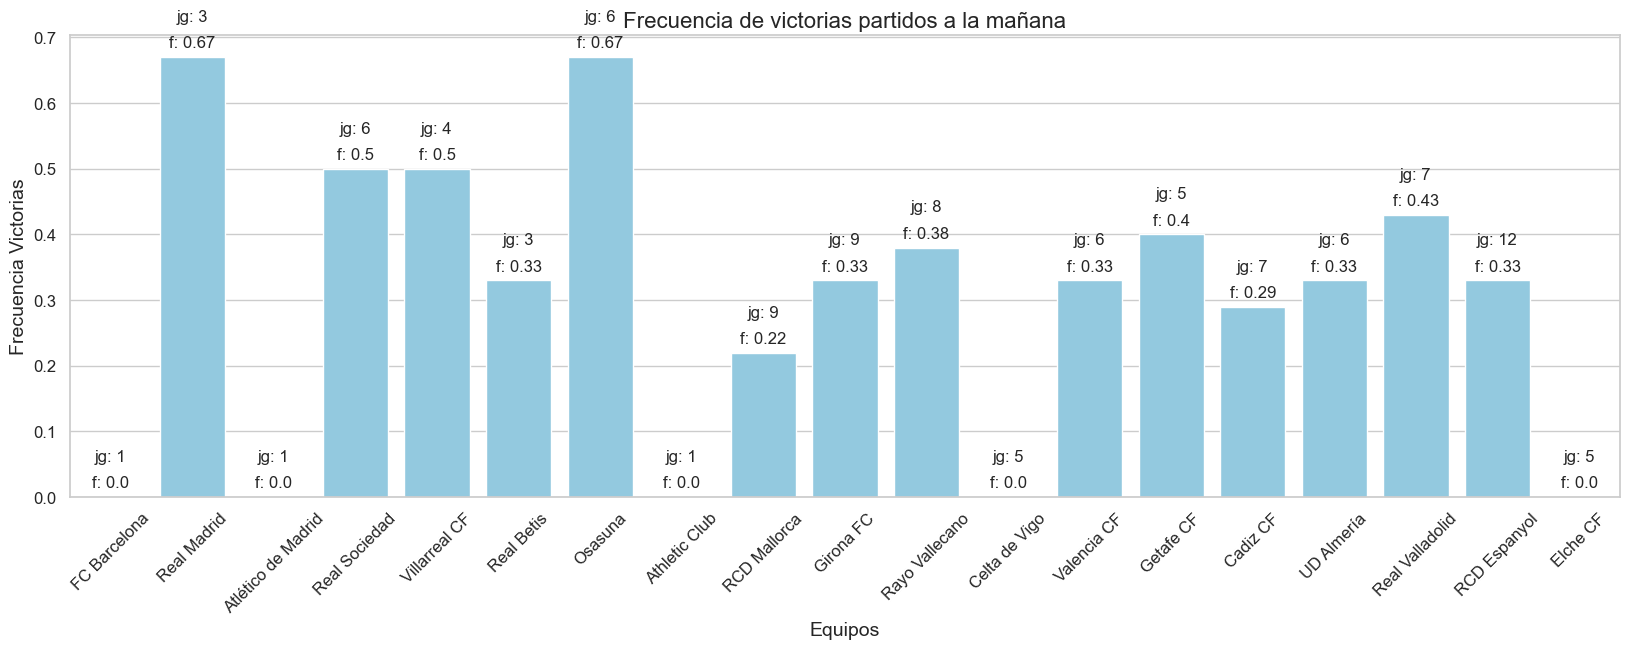

In [73]:
#Diagrama de barras mañana
equipos_mañana=df_clasi['Equipo']
sns.set(style="whitegrid")
plt.figure(figsize=(20, 6))
sns.barplot(x=equipos_mañana, y=l_mañana, color='skyblue')
plt.xlabel('Equipos', fontsize=14)
plt.ylabel('Frecuencia Victorias', fontsize=14)
plt.title('Frecuencia de victorias partidos a la mañana', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
ubicaciones, etiquetas = plt.xticks()
c=0
for i in l_mañana:
    plt.text(ubicaciones[c], i + 0.01, 'f: '+ str(i), ha='center', va='bottom')
    c+=1
c=0
for i,value in enumerate(l_mañana):
    plt.text(ubicaciones[c], value + 0.05, 'jg: '+ str(l_mañana_jugados[i]), ha='center', va='bottom')
    c+=1
plt.show()

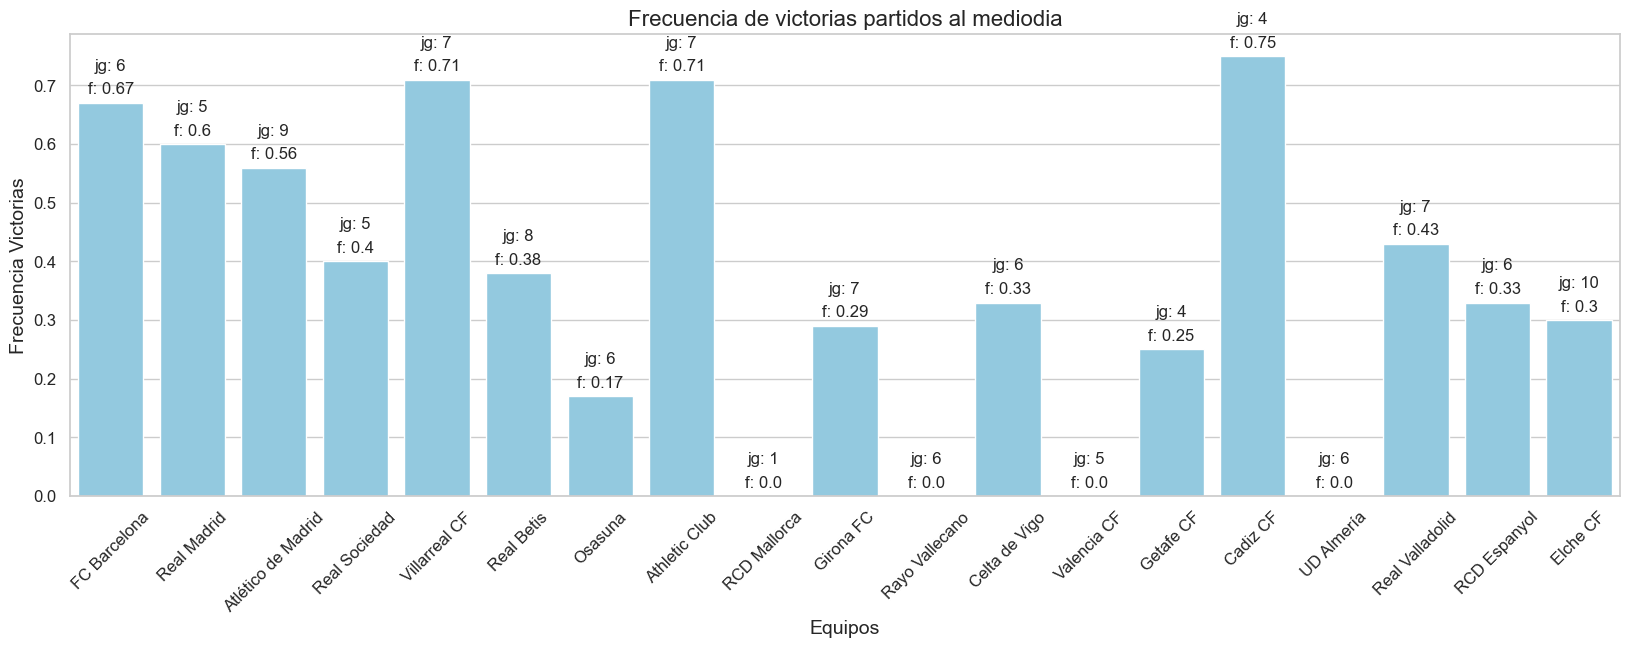

In [74]:
#Diagrama de barras mediodia
equipos_mediodia=df_clasi['Equipo']
sns.set(style="whitegrid")
plt.figure(figsize=(20, 6))
sns.barplot(x=equipos_mediodia, y=l_mediodia, color='skyblue')
plt.xlabel('Equipos', fontsize=14)
plt.ylabel('Frecuencia Victorias', fontsize=14)
plt.title('Frecuencia de victorias partidos al mediodia', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
ubicaciones, etiquetas = plt.xticks()
c=0
for i in l_mediodia:
    plt.text(ubicaciones[c], i + 0.01, 'f: '+ str(i), ha='center', va='bottom')
    c+=1
c=0
for i,value in enumerate(l_mediodia):
    plt.text(ubicaciones[c], value + 0.05, 'jg: '+ str(l_mediodia_jugados[i]), ha='center', va='bottom')
    c+=1
plt.show()

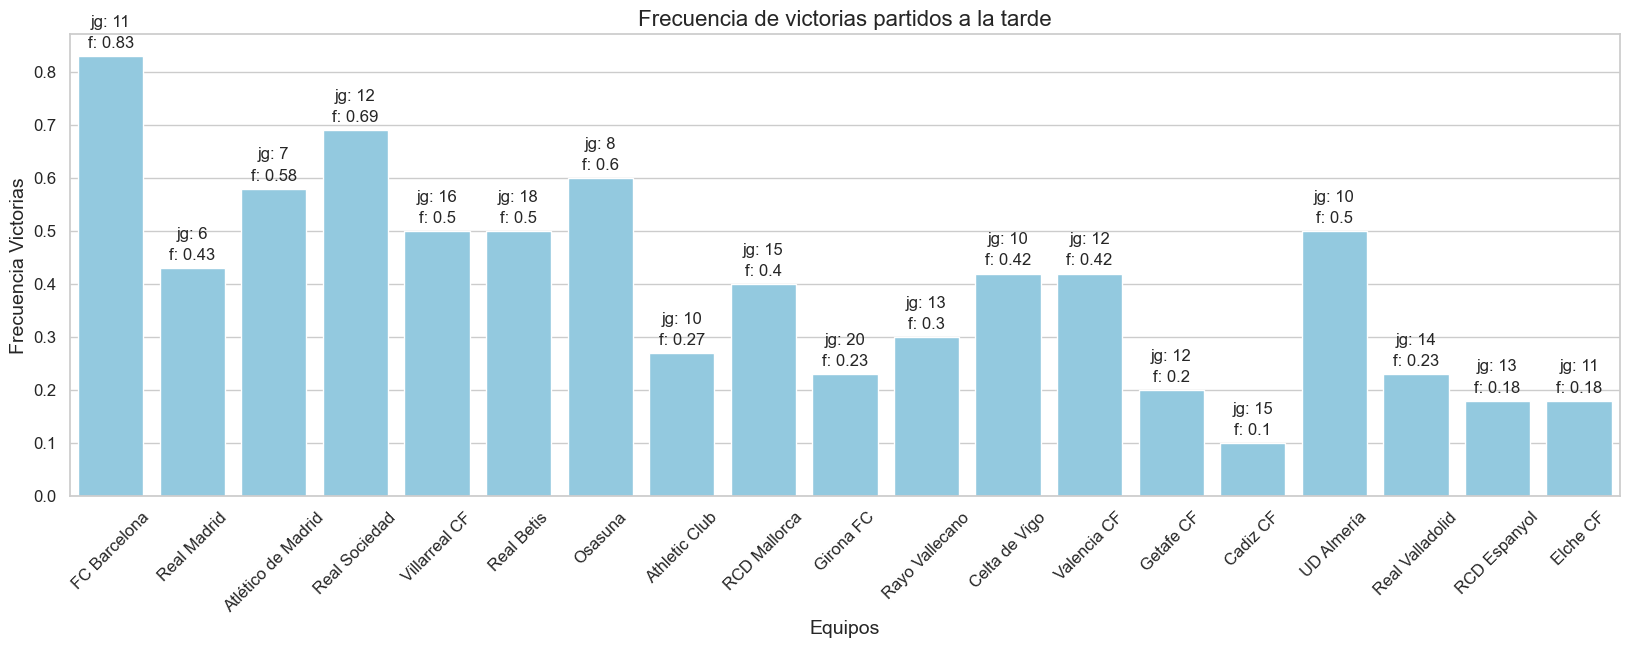

In [79]:
#Diagrama de barras a la tarde
equipos_tarde=df_clasi['Equipo']
sns.set(style="whitegrid")
plt.figure(figsize=(20, 6))
sns.barplot(x=equipos_tarde, y=l_tarde, color='skyblue')
plt.xlabel('Equipos', fontsize=14)
plt.ylabel('Frecuencia Victorias', fontsize=14)
plt.title('Frecuencia de victorias partidos a la tarde', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
ubicaciones, etiquetas = plt.xticks()
c=0
for i in l_tarde:
    plt.text(ubicaciones[c], i + 0.01, 'f: '+ str(i), ha='center', va='bottom')
    c+=1
c=0
for i,value in enumerate(l_tarde):
    plt.text(ubicaciones[c], value + 0.05, 'jg: '+ str(l_tarde_jugados[i]), ha='center', va='bottom')
    c+=1
plt.show()

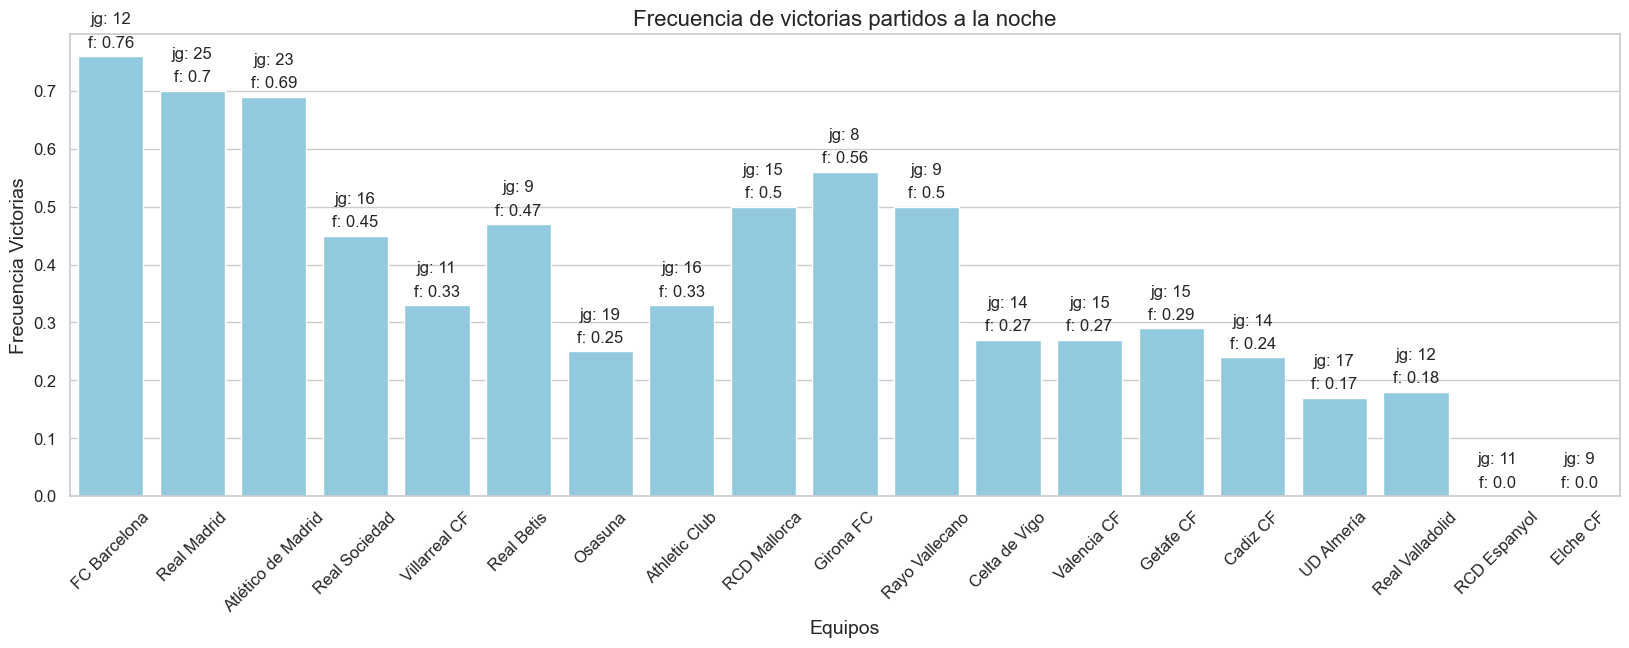

In [77]:
#Diagrama de barras noche
equipos_noche=df_clasi['Equipo']
sns.set(style="whitegrid")
plt.figure(figsize=(20, 6))
sns.barplot(x=equipos_noche, y=l_noche, color='skyblue')
plt.xlabel('Equipos', fontsize=14)
plt.ylabel('Frecuencia Victorias', fontsize=14)
plt.title('Frecuencia de victorias partidos a la noche', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
ubicaciones, etiquetas = plt.xticks()
c=0
for i in l_noche:
    plt.text(ubicaciones[c], i + 0.01, 'f: '+ str(i), ha='center', va='bottom')
    c+=1
c=0
for i,value in enumerate(l_noche):
    plt.text(ubicaciones[c], value + 0.05, 'jg: '+ str(l_noche_jugados[i]), ha='center', va='bottom')
    c+=1
plt.show()